In [2]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.cross_validation import train_test_split, StratifiedKFold, cross_val_score
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import roc_auc_score, f1_score
import matplotlib.pyplot as plt
%pylab inline
figsize(8, 6)

Populating the interactive namespace from numpy and matplotlib


**[Данные](https://bigml.com/user/francisco/gallery/dataset/5163ad540c0b5e5b22000383) по оттоку клиентов в телком-компании.**

In [3]:
df = pd.read_csv('../../data/telecom_churn.csv')

In [4]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [88]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333,NaN,NaN,NaN,101.065,39.8221,1,74,101,127,243
Area code,3333,NaN,NaN,NaN,437.182,42.3713,408,408,415,510,510
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333,NaN,NaN,NaN,8.09901,13.6884,0,0,0,20,51
Total day minutes,3333,NaN,NaN,NaN,179.775,54.4674,0,143.7,179.4,216.4,350.8
Total day calls,3333,NaN,NaN,NaN,100.436,20.0691,0,87,101,114,165
Total day charge,3333,NaN,NaN,NaN,30.5623,9.25943,0,24.43,30.5,36.79,59.64
Total eve minutes,3333,NaN,NaN,NaN,200.98,50.7138,0,166.6,201.4,235.3,363.7


In [89]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [90]:
state_enc = LabelEncoder()
df['State'] = state_enc.fit_transform(df['State'])

In [91]:
df['International plan'] = (df['International plan'] == 'Yes').astype('int')
df['Voice mail plan'] = (df['Voice mail plan'] == 'Yes').astype('int')

In [92]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


**Корреляции признаков**

In [93]:
predictors = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan']))
corr = df[predictors].corr()

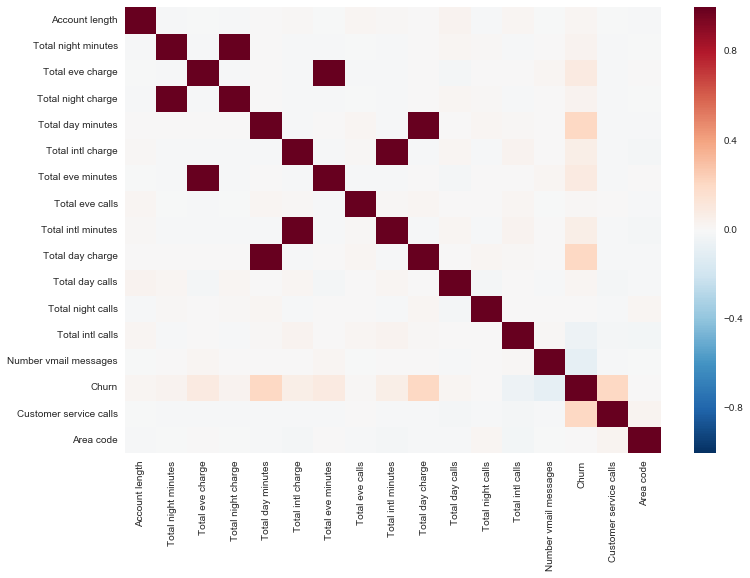

In [94]:
figsize(12, 8)
sns.heatmap(corr)

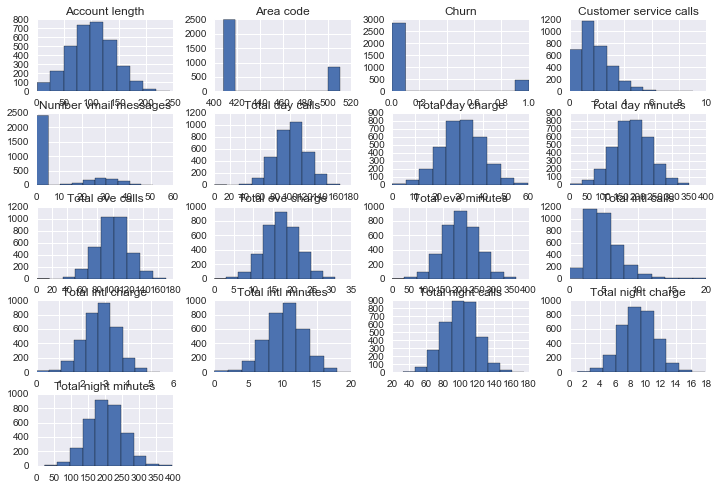

In [95]:
plots = df[predictors].hist()

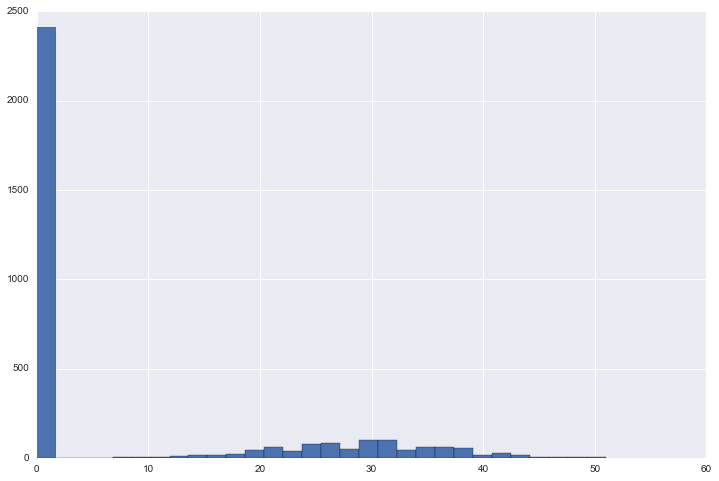

In [96]:
df['Number vmail messages'].hist(bins=30)

In [97]:
from sklearn.decomposition import PCA

In [98]:
data = df.drop('Churn', axis=1)

scaler = StandardScaler()
data = scaler.fit_transform(data)
pca = PCA(n_components=2)
pca_data = pca.fit_transform(data)

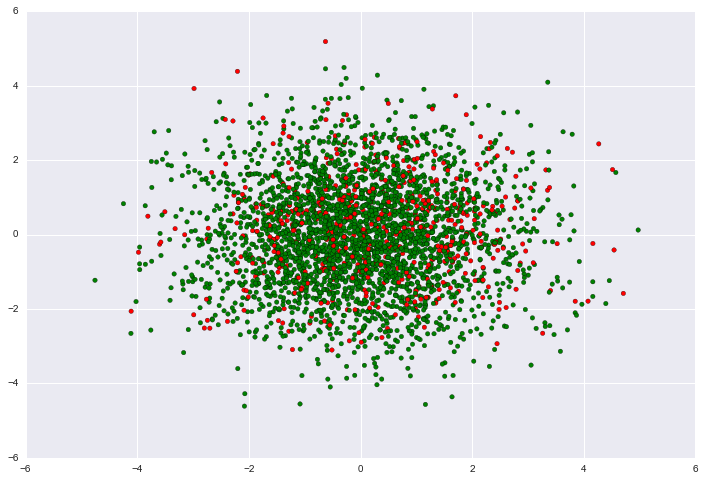

In [99]:
scatter(pca_data[:, 0], pca_data[:, 1], c=df['Churn'].apply(lambda churn: 'red' if churn else 'green'))

In [100]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=321)
tsne_representation = tsne.fit_transform(data)

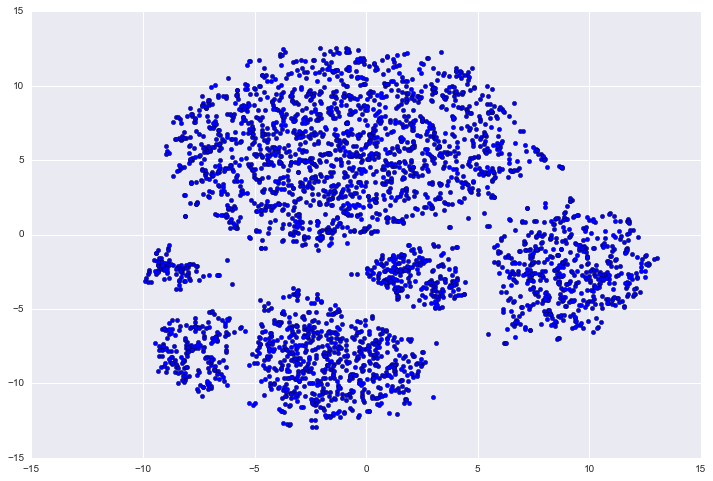

In [101]:
scatter(tsne_representation[:, 0], tsne_representation[:, 1])

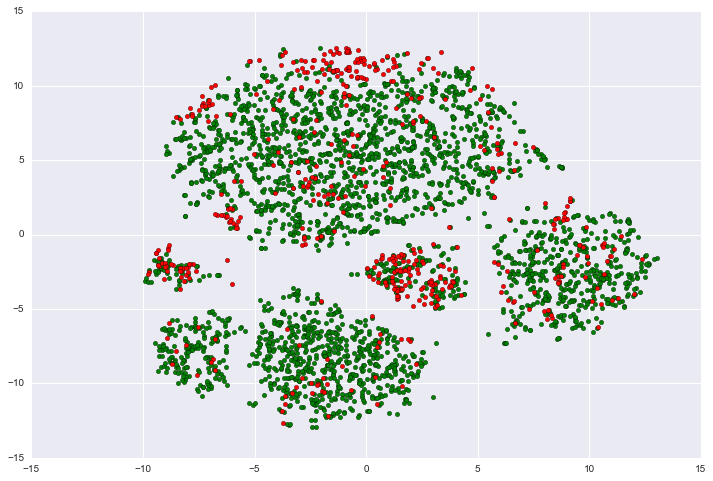

In [102]:
for (churn, color) in zip([0, 1], ['green', 'red']):
    scatter(tsne_representation[df[df['Churn'] == churn].index, 0], 
            tsne_representation[df[df['Churn'] == churn].index, 1], c=color)

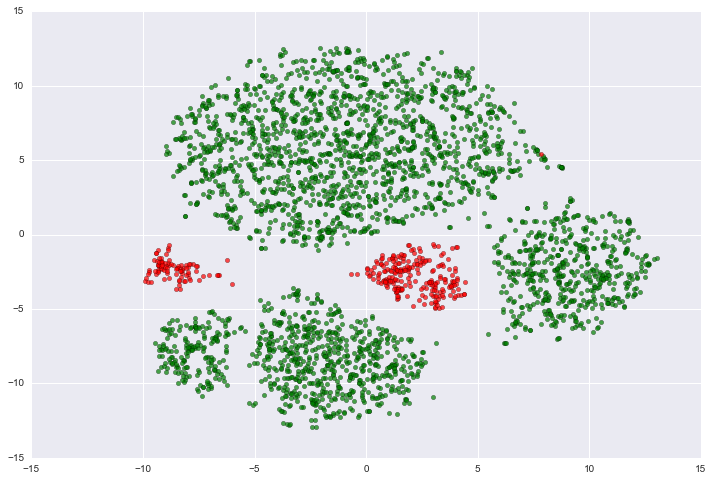

In [141]:
for (int_plan, color) in zip([0, 1], ['green', 'red']):
    scatter(tsne_representation[df[df['International plan'] == int_plan].index, 0], 
            tsne_representation[df[df['International plan'] == int_plan].index, 1], c=color, alpha=0.7)

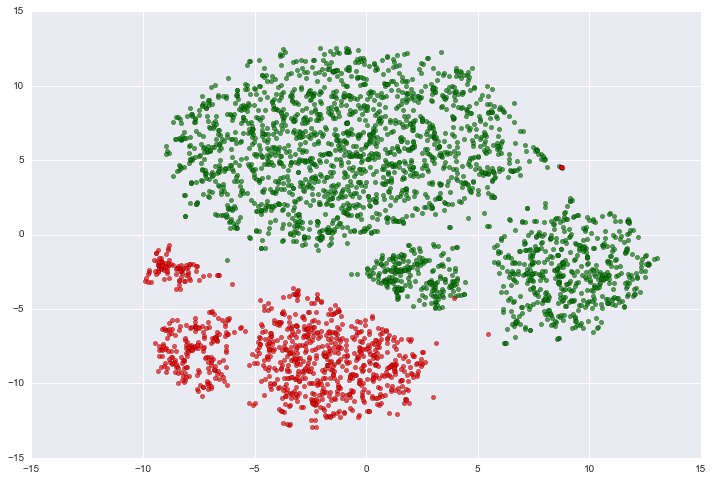

In [151]:
for (int_plan, color) in zip([0, 1], ['green', 'red']):
    scatter(tsne_representation[df[df['Voice mail plan'] == int_plan].index, 0], 
            tsne_representation[df[df['Voice mail plan'] == int_plan].index, 1], c=color, alpha=0.7)

In [103]:
df['No vmail messages'] = (df['Number vmail messages'] < 5).astype('int')

In [104]:
pd.crosstab(df['International plan'], df['Churn'])

Churn,False,True
International plan,,
0,2664,346
1,186,137


In [105]:
pd.crosstab(df['Voice mail plan'], df['Churn'])

Churn,False,True
Voice mail plan,,
0,2008,403
1,842,80


In [106]:
forest = RandomForestClassifier(1000, random_state=42, n_jobs=-1, oob_score=True)
forest.fit(df.drop('Churn', axis=1), df['Churn'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=-1,
            oob_score=True, random_state=42, verbose=0, warm_start=False)

In [107]:
pd.DataFrame(forest.feature_importances_, index=df.drop('Churn', axis=1).columns, 
             columns=['Importance']).sort_values(by='Importance', ascending=False)

,Importance
Total day charge,0.140025
Total day minutes,0.137163
Customer service calls,0.114596
International plan,0.077982
Total eve minutes,0.064528
Total eve charge,0.063805
Total intl calls,0.047740
Total intl minutes,0.040986
Total intl charge,0.040523
Total night minutes,0.036701


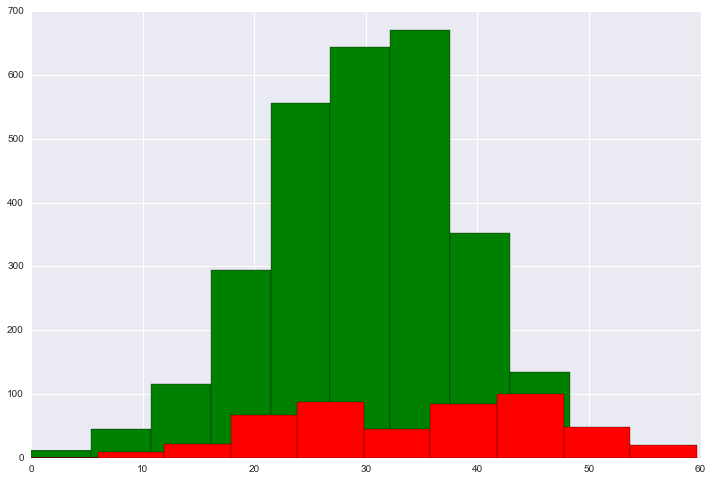

In [108]:
df[df['Churn']==False]['Total day charge'].hist(color='green')
df[df['Churn']==True]['Total day charge'].hist(color='red')

In [109]:
df['average cost'] = (df['Total day charge'] + df['Total night charge'] + 
                      df['Total eve charge'] + df['Total intl charge']) / \
                        (df['Total day minutes'] + df['Total night minutes'] +
                         df['Total eve minutes'] + df['Total intl minutes'])

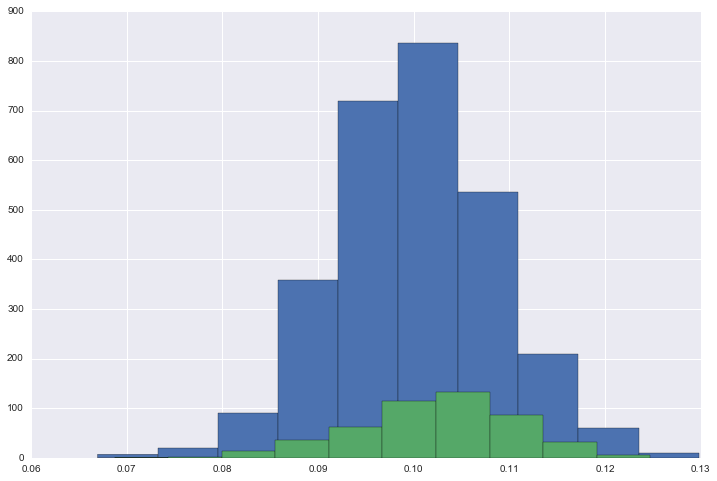

In [110]:
df[df['Churn'] == 0]['average cost'].hist()
df[df['Churn'] == 1]['average cost'].hist()

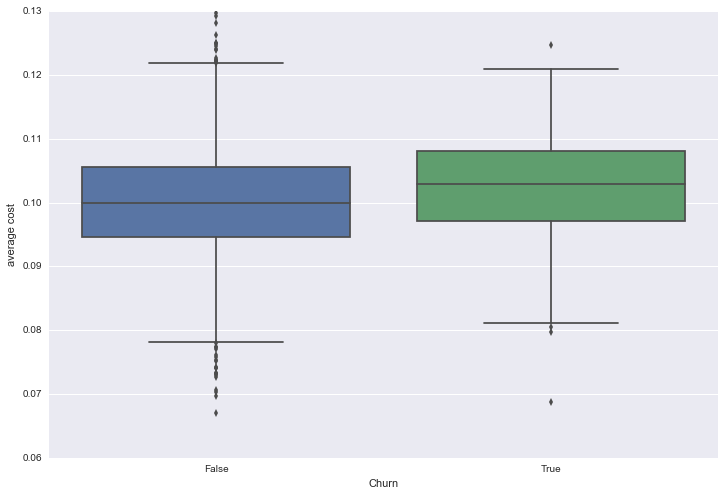

In [111]:
sns.boxplot(x='Churn', y='average cost', data=df)

In [112]:
mean_cust_calls_by_int_plan_dic = {0: df[df['International plan'] == 0]['Customer service calls'].mean(),
                                 1: df[df['International plan'] == 1]['Customer service calls'].mean()}

In [113]:
df['mean_cust_calls_by_int_plan'] = df['International plan'].apply(lambda plan: 
                                                                     mean_cust_calls_by_int_plan_dic[plan])

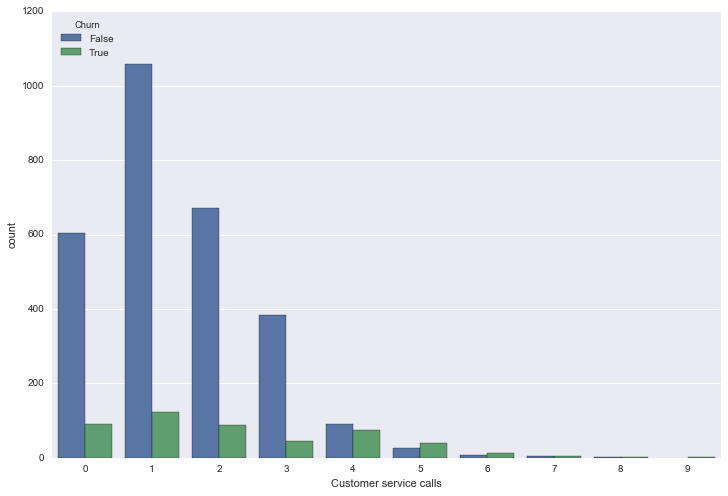

In [114]:
sns.countplot(df['Customer service calls'], hue=df['Churn'])

In [115]:
df['many_cust_calls'] = (df['Customer service calls'] > 3).astype('int')

In [116]:
forest = RandomForestClassifier(1000, random_state=42, n_jobs=-1, oob_score=True)
forest.fit(df.drop('Churn', axis=1), df['Churn'])
importances_df = pd.DataFrame(forest.feature_importances_, index=df.drop('Churn', axis=1).columns, 
             columns=['Importance']).sort_values(by='Importance', ascending=False)

In [117]:
importances_df

,Importance
Total day charge,0.128632
Total day minutes,0.125634
Customer service calls,0.062336
Total eve charge,0.061585
Total eve minutes,0.059172
many_cust_calls,0.054608
Total intl calls,0.050416
average cost,0.045699
Total intl charge,0.041790
Total intl minutes,0.041058


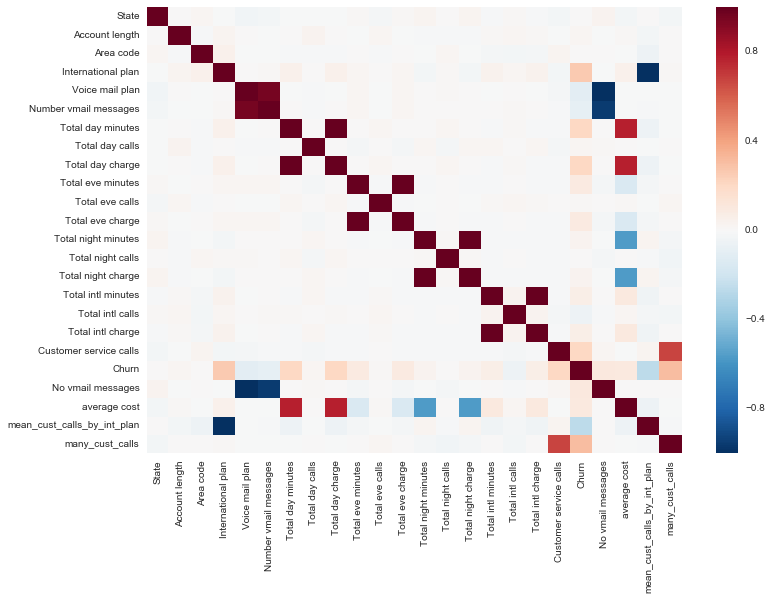

In [118]:
sns.heatmap(df.corr())

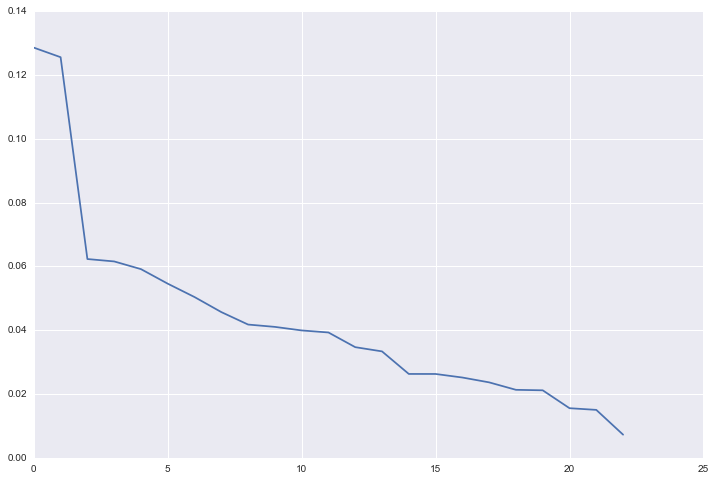

In [119]:
plot(range(importances_df['Importance'].shape[0]),
           importances_df['Importance'])

In [120]:
predictors = importances_df.index.tolist()[:15]

In [121]:
train_df, test_df, y_train, y_test = train_test_split(df.drop('Churn', axis=1), df['Churn'], 
                                                      test_size=0.3, random_state=42)

In [122]:
def cv_scores(clf, train_df, y_series, random_state=42, scale=False):
    
    scores = []
    folds = StratifiedKFold(y_series, n_folds=5, random_state=random_state)
    for train_idx, test_idx in folds:
        X_train, X_test = train_df.iloc[train_idx, :], train_df.iloc[test_idx,:]
        y_train, y_test = y_series.iloc[train_idx], y_series.iloc[test_idx]
        
        if scale:
            scaler = StandardScaler()
            X_train = scaler.fit_transform(X_train)
            X_test = scaler.transform(X_test)
        
        clf.fit(X_train, y_train)
        
        scores.append(roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))
        
    return(scores)

In [123]:
depths = range(20, 51, 5)
scores = []

for depth in depths:
    scores.append(np.mean(cv_scores(RandomForestClassifier(max_depth=depth,
                                                          random_state=42), train_df, y_train)))

(0.89858904021804453, 20)


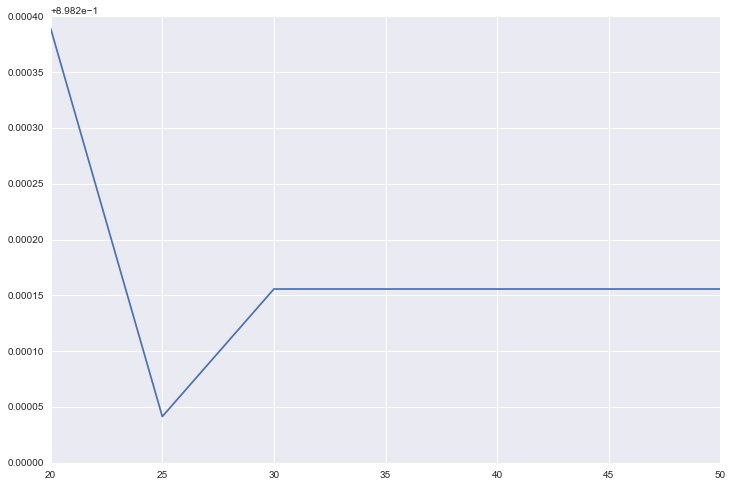

In [124]:
plot(depths, scores)
print(max(scores), depths[np.argmax(scores)])

In [125]:
depths = range(1, 16, 5)
scores = []

for depth in depths:
    scores.append(np.mean(cv_scores(XGBClassifier(max_depth=depth), train_df, y_train)))

(0.90153676387243598, 6)


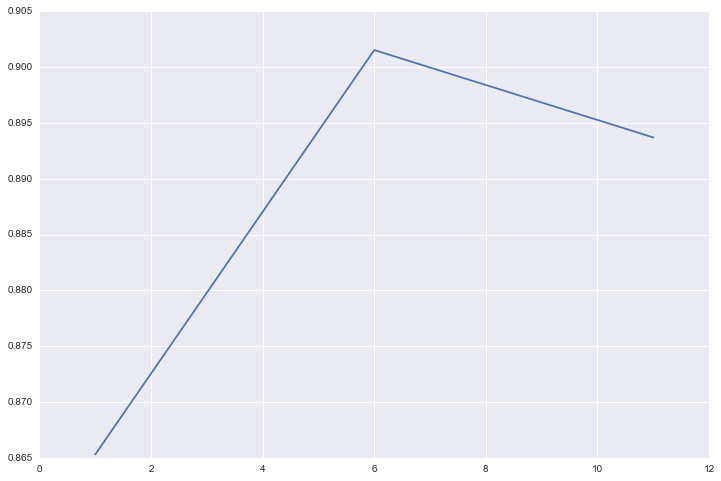

In [126]:
plot(depths, scores)
print(max(scores), depths[np.argmax(scores)])

In [127]:
lrates = np.linspace(0.1, 1, 10)
scores = []

for lrate in lrates:
    scores.append(np.mean(cv_scores(XGBClassifier(max_depth=6, learning_rate=lrate), train_df, y_train)))

(0.90303724504877325, 0.30000000000000004)


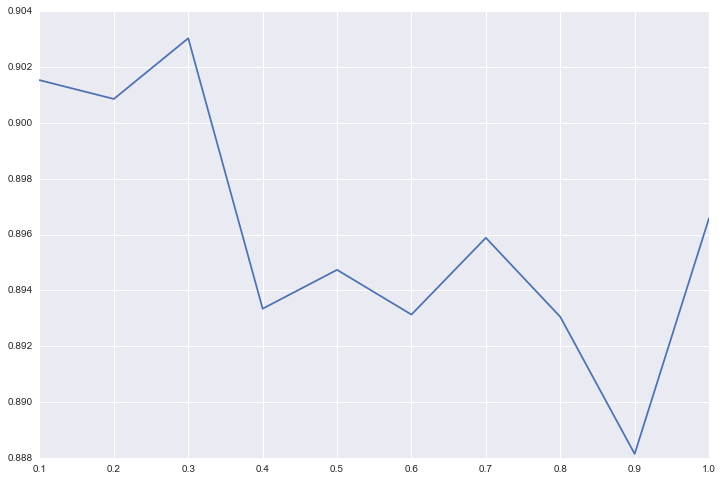

In [128]:
plot(lrates, scores)
print(max(scores), lrates[np.argmax(scores)])

In [129]:
clf = XGBClassifier()

clf_params = {'n_estimators': [50, 100, 150],
             'learning_rate': np.linspace(0.1, 1, 5),
             'max_depth': range(5, 8)}

folds = StratifiedKFold(y_train, n_folds=3, random_state=42)

grid_searcher = GridSearchCV(clf, clf_params, scoring='roc_auc', cv=folds, verbose=True)
grid_searcher.fit(train_df, y_train)

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:   15.0s
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:   38.5s finished


GridSearchCV(cv=sklearn.cross_validation.StratifiedKFold(labels=[False False ..., False False], n_folds=3, shuffle=False, random_state=42),
       error_score='raise',
       estimator=XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [50, 100, 150], 'learning_rate': array([ 0.1  ,  0.325,  0.55 ,  0.775,  1.   ]), 'max_depth': [5, 6, 7]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc',
       verbose=True)

In [130]:
grid_searcher.best_params_, grid_searcher.best_score_

({'learning_rate': 0.10000000000000001, 'max_depth': 7, 'n_estimators': 50},
 0.90346201507456658)

In [131]:
from sklearn.learning_curve import validation_curve
from sklearn.learning_curve import learning_curve

def plot_with_std(x, data, **kwargs):
        mu, std = data.mean(1), data.std(1)
        lines = plt.plot(x, mu, '-', **kwargs)
        plt.fill_between(x, mu - std, mu + std, edgecolor='none',
                         facecolor=lines[0].get_color(), alpha=0.2)
        
def plot_learning_curve(clf, X, y, scoring, cv=5):
 
    train_sizes = np.linspace(0.05, 1, 20)
    n_train, val_train, val_test = learning_curve(clf,
                                                  X, y, train_sizes, cv=cv,
                                                  scoring=scoring)
    plot_with_std(n_train, val_train, label='training scores', c='green')
    plot_with_std(n_train, val_test, label='validation scores', c='red')
    plt.xlabel('Training Set Size'); plt.ylabel(scoring)
    plt.legend()

def plot_validation_curve(clf, X, y, cv_param_name, 
                          cv_param_values, scoring):

    val_train, val_test = validation_curve(clf, X, y, cv_param_name,
                                           cv_param_values, cv=5,
                                                  scoring=scoring)
    plot_with_std(cv_param_values, val_train, 
                  label='training scores', c='green')
    plot_with_std(cv_param_values, val_test, 
                  label='validation scores', c='red')
    plt.xlabel(cv_param_name); plt.ylabel(scoring)
    plt.legend()

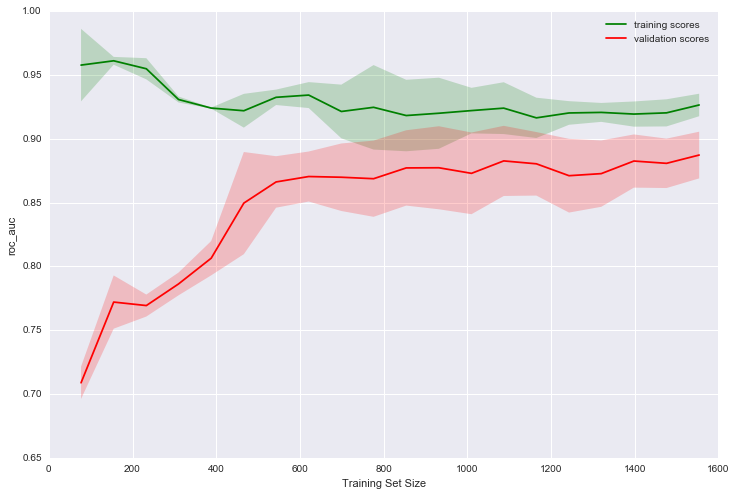

In [132]:
plot_learning_curve(XGBClassifier(n_estimators=2, max_depth=7, learning_rate=0.1), train_df, y_train,
                   scoring='roc_auc', cv=folds)

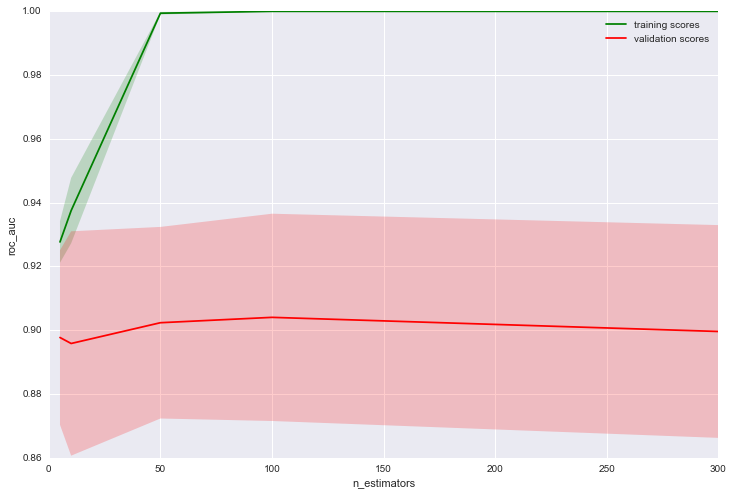

In [133]:
n_iters = [5, 10, 50, 100, 300]
plot_validation_curve(XGBClassifier(max_depth=7, learning_rate=0.1), 
                      train_df, y_train,
                      cv_param_name='n_estimators',
                      cv_param_values=n_iters,
                       scoring='roc_auc')

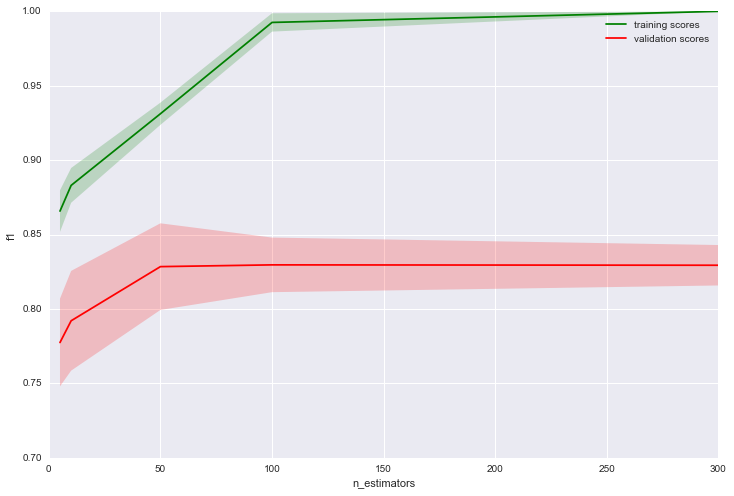

In [134]:
n_iters = [5, 10, 50, 100, 300]
plot_validation_curve(XGBClassifier(max_depth=7, learning_rate=0.1), 
                      train_df, y_train,
                      cv_param_name='n_estimators',
                      cv_param_values=n_iters,
                       scoring='f1')

**Прогноз для отложенной выборки.**

In [135]:
final_xgb = XGBClassifier(n_estimators=100, max_depth=7, learning_rate=0.1)
final_xgb.fit(train_df, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=7,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='binary:logistic', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [136]:
roc_auc_score(y_test, final_xgb.predict_proba(test_df)[:, 1])

0.92665094532072356

In [137]:
f1_score(y_test, final_xgb.predict(test_df))

0.81568627450980391